In [40]:
!pip install pandas numpy matplotlib seaborn scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### 1. Análise da base Titanic
Importação das bibliotecas e leitura do arquivo Titanic-Dataset.csv para visualização inicial dos dados.

In [7]:
# Análise da base Titanic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import os

dataset = "Titanic-Dataset.csv"
titanic_df = pd.read_csv(dataset)  
titanic_df.head(60)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### 3. Inspeção e Tratamento de Dados Ausentes
Verificação da presença de valores ausentes em cada coluna do dataset e tratamento desses dados, preenchendo a idade com a mediana e removendo linhas com muitos nulos.

In [10]:
missing_values = titanic_df.isnull().sum()
print('Valores ausentes por coluna:')
print(missing_values)

titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df.dropna(thresh=titanic_df.shape[1]-2, inplace=True)
titanic_df.isnull().sum()

Valores ausentes por coluna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


C:\Users\crist\AppData\Local\Temp\ipykernel_21232\58742407.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 4. Remoção de Outliers
Identificação e remoção de outliers nas variáveis numéricas principais ('Age' e 'Fare') utilizando o método do Intervalo Interquartil (IQR).

In [14]:
def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    for column in columns:
        Q1 = df_clean[column].quantile(0.25)
        Q3 = df_clean[column].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[column] >= lower) & (df_clean[column] <= upper)]
    return df_clean

numeric_cols = ['Age', 'Fare']

print("Tamanho antes da remoção de outliers:", len(titanic_df))
titanic_df = remove_outliers_iqr(titanic_df, numeric_cols)
print("Tamanho depois da remoção de outliers:", len(titanic_df))
titanic_df.head(10)


Tamanho antes da remoção de outliers: 441
Tamanho depois da remoção de outliers: 408


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,False,True
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,False,True
5,6,0,3,"Moran, Mr. James",1,28.0,0,0,330877,8.4583,NaN,True,False
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,False,True
12,13,0,3,"Saundercock, Mr. William Henry",1,20.0,0,0,A/5. 2151,8.0500,NaN,False,True
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",0,14.0,0,0,350406,7.8542,NaN,False,True
17,18,1,2,"Williams, Mr. Charles Eugene",1,28.0,0,0,244373,13.0000,NaN,False,True
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",0,31.0,1,0,345763,18.0000,NaN,False,True
19,20,1,3,"Masselmani, Mrs. Fatima",0,28.0,0,0,2649,7.2250,NaN,False,False


### 5. Conversão de Variáveis Categóricas para Numéricas
Transformação das variáveis categóricas 'Sex' e 'Embarked' em variáveis numéricas usando LabelEncoder e one-hot encoding para facilitar análises quantitativas.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

dataset = "Titanic-Dataset.csv"
titanic_df = pd.read_csv(dataset)

titanic_df['Sex'] = LabelEncoder().fit_transform(titanic_df['Sex'])
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'], drop_first=True)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,False,True


### 6. Normalização dos Dados
Padronização das variáveis numéricas 'age' e 'fare' utilizando o StandardScaler, gerando colunas normalizadas para uso em análises e modelos.

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

modelo_df = titanic_df.copy()

modelo_df.columns = [c.lower() for c in modelo_df.columns]
num_cols = ['age', 'fare']

scaler = StandardScaler()
modelo_df[[col + "_scaled" for col in num_cols]] = scaler.fit_transform(modelo_df[num_cols])

display(modelo_df.head(10))


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_scaled,fare_scaled
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,-0.530377,-0.502445
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0.571831,0.786845
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,-0.254825,-0.488854
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0.365167,0.420730
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0.365167,-0.486337
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,NaN,-0.478116
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,1.674039,0.395814
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,-1.908136,-0.224083
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,-0.185937,-0.424256
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,-1.081480,-0.042956


### 7. Sumarização Estatística dos Dados
Apresentação de estatísticas descritivas (média, mediana, variância e desvio padrão) para as variáveis numéricas do dataset.

In [27]:
numeric_cols = titanic_df.select_dtypes(include='number').columns

summary = titanic_df[numeric_cols].describe().T
summary['median'] = titanic_df[numeric_cols].median()
summary['variance'] = titanic_df[numeric_cols].var()
summary['std'] = titanic_df[numeric_cols].std()
summary[['mean', 'median', 'variance', 'std']]


,mean,median,variance,std
survived,0.383838,0.0000,0.236772,0.486592
pclass,2.308642,3.0000,0.699015,0.836071
age,29.699118,28.0000,211.019125,14.526497
sibsp,0.523008,0.0000,1.216043,1.102743
parch,0.381594,0.0000,0.649728,0.806057
fare,32.204208,14.4542,2469.436846,49.693429


### 10. Exploração de Correlações entre Variáveis e Sobrevivência
Cálculo e visualização das correlações entre variáveis numéricas e a variável alvo (sobrevivência) por meio de matriz de correlação e mapa de calor.

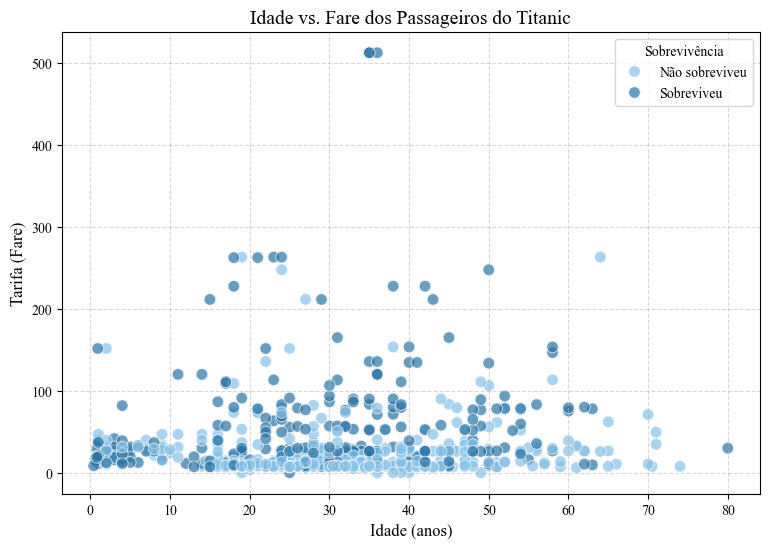

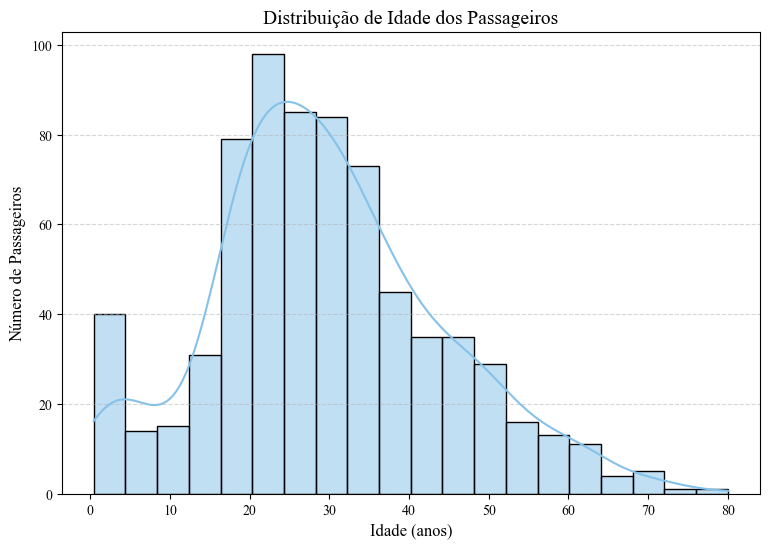

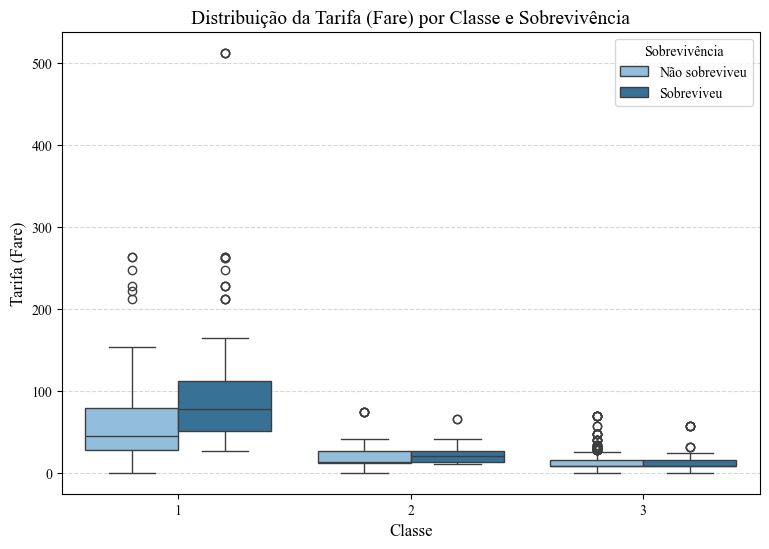

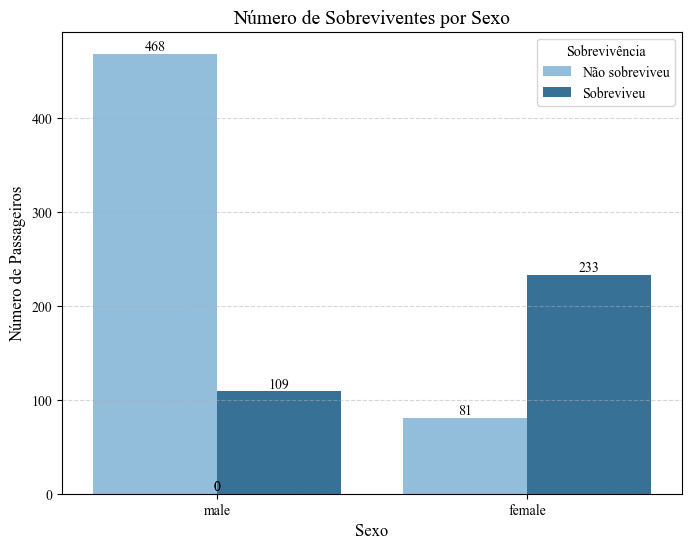

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

titanic_df = sns.load_dataset("titanic")
grafico_df = titanic_df.copy()

plt.rcParams['font.family'] = 'Times New Roman'
blue_palette = ['#85C1E9', '#2874A6']  

# 1️. Gráfico de dispersão: Idade vs. Fare por Sobrevivência
plt.figure(figsize=(9,6))
scatter = sns.scatterplot(
    x='age',   
    y='fare',  
    hue='survived', 
    data=grafico_df, 
    palette=blue_palette,
    alpha=0.7,
    s=70
)
plt.title('Idade vs. Fare dos Passageiros do Titanic', fontsize=14)
plt.xlabel('Idade (anos)', fontsize=12)
plt.ylabel('Tarifa (Fare)', fontsize=12)
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Não sobreviveu', 'Sobreviveu'], title='Sobrevivência')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# 2️. Histograma de Idade com KDE
plt.figure(figsize=(9,6))
sns.histplot(
    grafico_df['age'],   
    bins=20, 
    kde=True, 
    color=blue_palette[0],
    edgecolor='black'
)
plt.title('Distribuição de Idade dos Passageiros', fontsize=14)
plt.xlabel('Idade (anos)', fontsize=12)
plt.ylabel('Número de Passageiros', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# 3️. Boxplot de Fare por Classe e Sobrevivência
plt.figure(figsize=(9,6))
box = sns.boxplot(
    x='pclass', 
    y='fare',   
    hue='survived', 
    data=grafico_df, 
    palette=blue_palette
)
plt.title('Distribuição da Tarifa (Fare) por Classe e Sobrevivência', fontsize=14)
plt.xlabel('Classe', fontsize=12)
plt.ylabel('Tarifa (Fare)', fontsize=12)
handles, labels = box.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Não sobreviveu', 'Sobreviveu'], title='Sobrevivência')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# 4️. Gráfico de barras: Sobreviventes por Sexo (mantido como estava)
plt.figure(figsize=(8,6))
sns.countplot(
    x='sex', 
    hue='survived', 
    data=grafico_df, 
    palette=blue_palette
)
plt.title('Número de Sobreviventes por Sexo', fontsize=14)
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Número de Passageiros', fontsize=12)
plt.legend(title='Sobrevivência', labels=['Não sobreviveu', 'Sobreviveu'])
plt.grid(axis='y', linestyle='--', alpha=0.5)

for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='bottom', fontsize=10)
plt.show()


### 8. Visualizações 2D dos Dados
Gráficos de dispersão, histogramas, boxplots e barras agrupadas para explorar relações entre variáveis e padrões de sobrevivência.

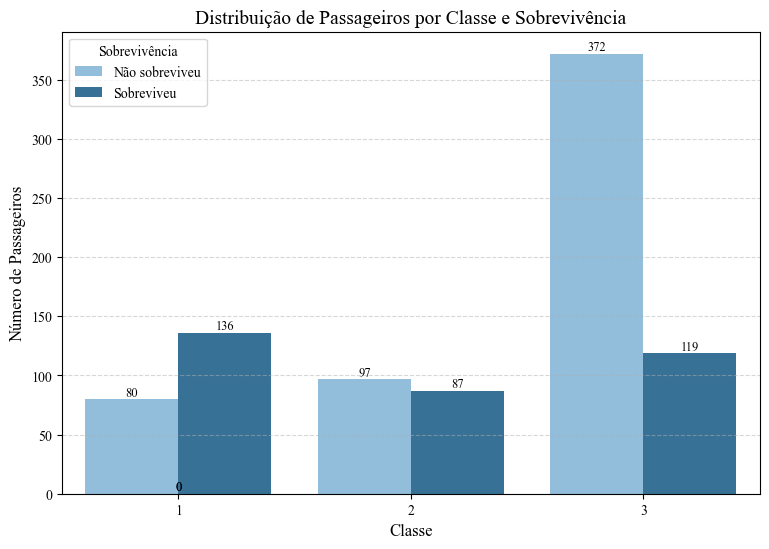

C:\Users\crist\AppData\Local\Temp\ipykernel_13468\3850392997.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\crist\AppData\Local\Temp\ipykernel_13468\3850392997.py:35: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


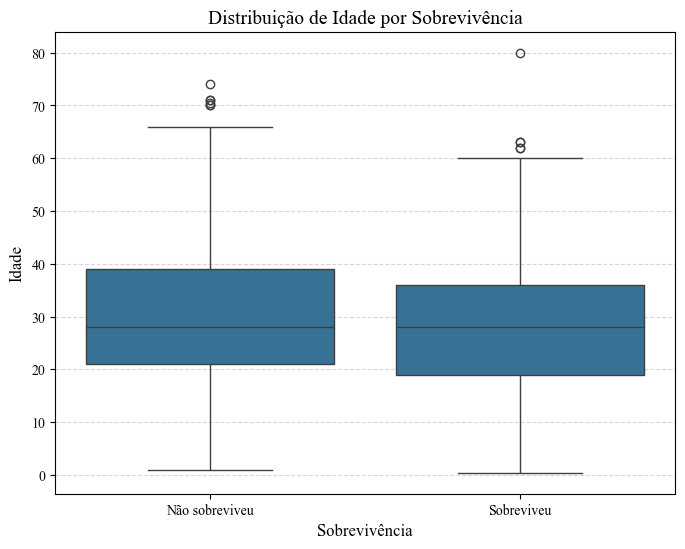

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

titanic_df = sns.load_dataset("titanic")
grafico_df = titanic_df.copy()

plt.rcParams['font.family'] = 'Times New Roman'

blue_palette = ['#2874A6']  # azul escuro

# 1️. Gráfico de Barras Agrupadas - Sobrevivência por Classe
plt.figure(figsize=(9,6))
grouped_bar = sns.countplot(
    data=grafico_df, 
    x="pclass", 
    hue="survived", 
    palette=['#85C1E9', '#2874A6']
)
plt.title("Distribuição de Passageiros por Classe e Sobrevivência", fontsize=14)
plt.xlabel("Classe", fontsize=12)
plt.ylabel("Número de Passageiros", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

for p in grouped_bar.patches:
    grouped_bar.annotate(f'{int(p.get_height())}', 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='bottom', fontsize=9)

plt.legend(title="Sobrevivência", labels=["Não sobreviveu", "Sobreviveu"])
plt.show()

# 2️. Gráfico de Idade x Sobrevivência (Boxplot)
plt.figure(figsize=(8,6))
sns.boxplot(
    x='survived', 
    y='age', 
    data=grafico_df, 
    palette=blue_palette
)
plt.title("Distribuição de Idade por Sobrevivência", fontsize=14)
plt.xlabel("Sobrevivência", fontsize=12)
plt.ylabel("Idade", fontsize=12)
plt.xticks([0,1], ['Não sobreviveu', 'Sobreviveu'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()



### 9. Análise de Padrões Relacionados à Sobrevivência
Identificação de padrões de sobrevivência considerando idade, gênero e classe dos passageiros, com apoio de visualizações e contagens.

Correlação entre variáveis numéricas e sobrevivência:
survived    1.000000
fare        0.257307
parch       0.081629
sibsp      -0.035322
age        -0.077221
pclass     -0.338481
Name: survived, dtype: float64


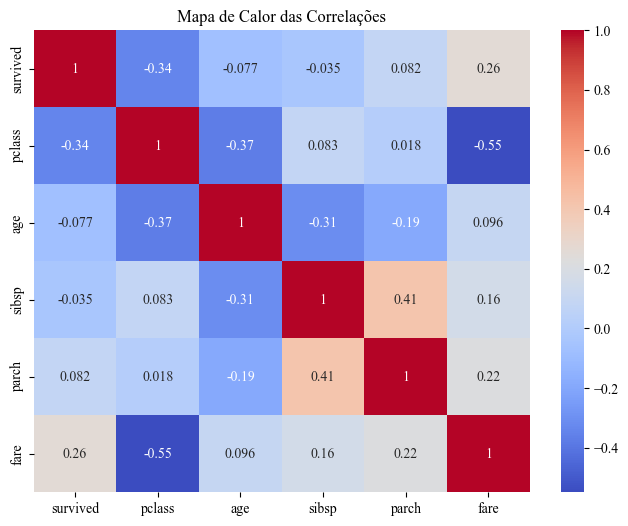

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleciona somente colunas numéricas
numeric_df = titanic_df.select_dtypes(include='number')

# Correlação
corr = numeric_df.corr()
print('Correlação entre variáveis numéricas e sobrevivência:')
print(corr['survived'].sort_values(ascending=False))

# Mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor das Correlações')
plt.show()
